#逻辑回归-线性不可分

#案例：假设时工厂生产主管，决定生产芯片是否接受

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'E:/ML_NG/02-logistic_regression/ex2data2.txt'
data = pd.read_csv(path,names=['Test1','Test2','Accepted'])
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


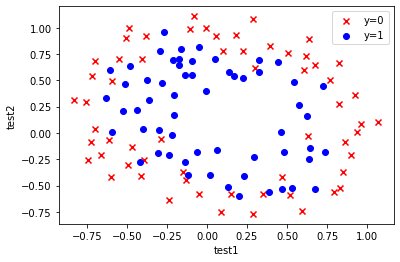

In [3]:
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test1'],data[data['Accepted']==0]['Test2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test1'],data[data['Accepted']==1]['Test2'],c='b',marker='o',label='y=1')
ax.legend()

ax.set(xlabel='test1',ylabel='test2')
plt.show()

##特征映射

In [9]:
def feature_mapping(x1,x2,power):
    data = {}
    
    for i in range(power + 1):
        for j in range(i + 1):
            data['F{}{}'.format(i-j,j)] = np.power(x1,i-j) * np.power(x2,j)
            
    return pd.DataFrame(data)

In [7]:
x1 = data['Test1']
x2 = data['Test2']

In [10]:
data2 = feature_mapping(x1,x2,6)

In [12]:
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


#data

In [13]:
X = data2.values

In [14]:
X.shape

(118, 28)

In [16]:
y = data.iloc[:,-1].values

y = y.reshape(len(y),1)
y.shape

(118, 1)

#cost function

In [17]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [24]:
def costFunction(X,y,theta,lamda):
    A = sigmoid(X@theta)
    
    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    
    reg = np.sum(np.power(theta[1:],2)) * (lamda / 2 * len(X))
    
    return -np.sum(first + second)/len(X) + reg

In [19]:
theta = np.zeros((28,1))
theta.shape

(28, 1)

In [20]:
lamda = 1

In [25]:
cost_init = costFunction(X,y,theta,lamda)
print(cost_init)

0.6931471805599454


#梯度下降

In [27]:
def gradientDescent(X,y,theta,iters,alpha,lamda):
    m = len(X)
    costs = []
    
    reg = np.power(theta[1:],2) * (lamda * len(X))
    reg = np.insert(reg,0,values=0,axis=0)
    
    for i in range(iters):
        A = sigmoid(X@theta)
        theta = theta -(alpha/m) * X.T @ (A - y)
        cost = costFunction(X,y,theta,lamda)
        costs.append(cost)
        #if i % 100 ==0:
            #print(cost)
    return costs,theta

In [28]:
alpha = 0.001
iters = 200000
lamda = 0.001

In [29]:
costs,theta_final = gradientDescent(X,y,theta,iters,alpha,lamda)

In [30]:
def predict(X,theta):
    
    prob = sigmoid(X@theta)
    
    return [1 if x>=0.5 else 0 for x in prob]

In [31]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)

acc = np.mean(y_pre == y)

print(acc)

0.8135593220338984


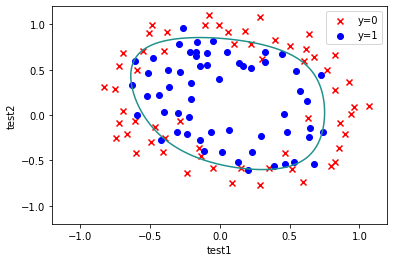

In [34]:
x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = feature_mapping(xx.ravel(),yy.ravel(),6).values

zz = z @ theta_final
zz = zz.reshape(xx.shape)

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test1'],data[data['Accepted']==0]['Test2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test1'],data[data['Accepted']==1]['Test2'],c='b',marker='o',label='y=1')
ax.legend()

ax.set(xlabel='test1',ylabel='test2')
plt.contour(xx,yy,zz,0)
plt.show()

